In [64]:
import numpy as np
import glob
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.pylab as pl
import matplotlib.ticker as mticker
import matplotlib.colors
from chainconsumer import ChainConsumer
%matplotlib inline

aqua='#008E97'
orange='#FC4C02'
blue='#005778'

figsize = (20,5)

In [89]:
data = 'data/power_data_0.dat'
res  = 'data/power_residual_t0.dat'
wave = 'data/power_reconstruction_t0.dat'
rec_files = glob.glob('catalog*/*power_reconstruction.dat')
chain_files = glob.glob('catalog*/*chain.dat')
entry_files = glob.glob('catalog*/entries.dat')
entries=np.genfromtxt(entry_files[0],usecols=(0),dtype='str')


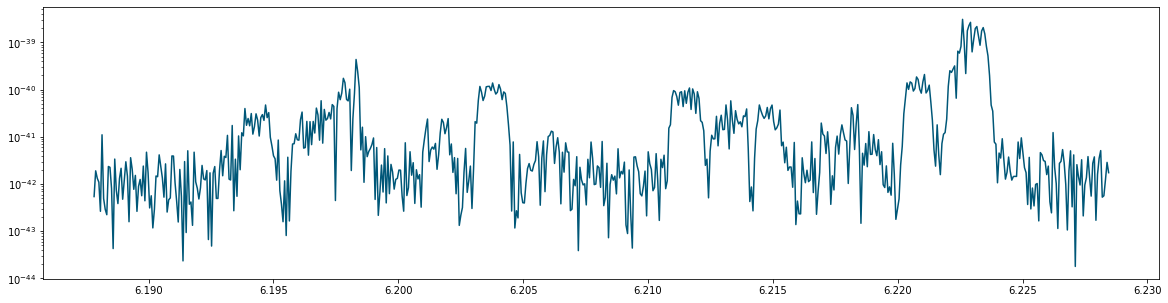

In [42]:
fig,ax=plt.subplots(figsize=figsize)
f = np.loadtxt(data,usecols=(0))
A = np.loadtxt(data,usecols=(1))
E = np.loadtxt(data,usecols=(2))
ax.semilogy(f*1000,A,color=blue)

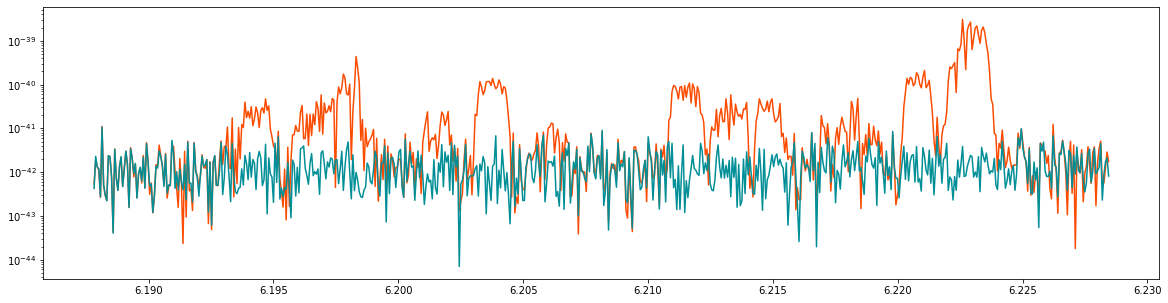

In [48]:
fig,ax=plt.subplots(figsize=figsize)

f = np.loadtxt(data,usecols=(0))
A = np.loadtxt(data,usecols=(1))
E = np.loadtxt(data,usecols=(2))
ax.semilogy(f*1000,A,color=orange)

f = np.loadtxt(res,usecols=(0))
A = np.loadtxt(res,usecols=(1))
E = np.loadtxt(res,usecols=(2))
ax.semilogy(f*1000,A,color=aqua)

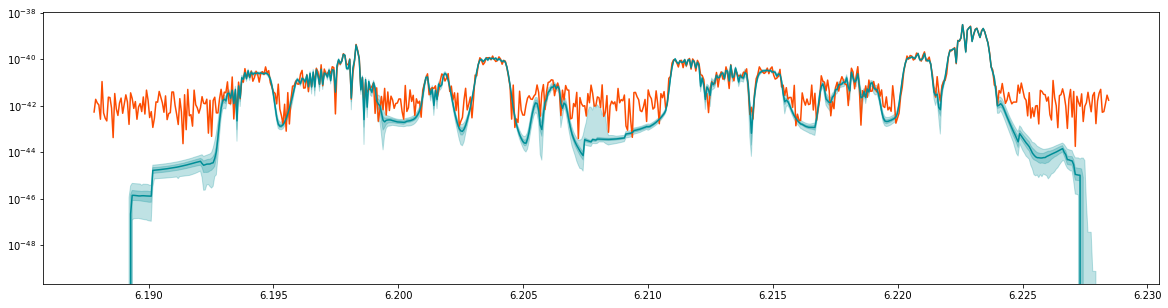

In [47]:
fig,ax=plt.subplots(figsize=figsize)

f = np.loadtxt(data,usecols=(0))
A = np.loadtxt(data,usecols=(1))
E = np.loadtxt(data,usecols=(2))
ax.semilogy(f*1000,A,color=orange)

f = np.loadtxt(wave,usecols=(0))
A50 = np.loadtxt(wave,usecols=(1))
A25 = np.loadtxt(wave,usecols=(2))
A75 = np.loadtxt(wave,usecols=(3))
A05 = np.loadtxt(wave,usecols=(4))
A95 = np.loadtxt(wave,usecols=(5))
ax.fill_between(f*1000,A05,A95,alpha=0.25,color=aqua)
ax.fill_between(f*1000,A25,A75,alpha=0.25,color=aqua)
ax.semilogy(f*1000,A50,color=aqua)

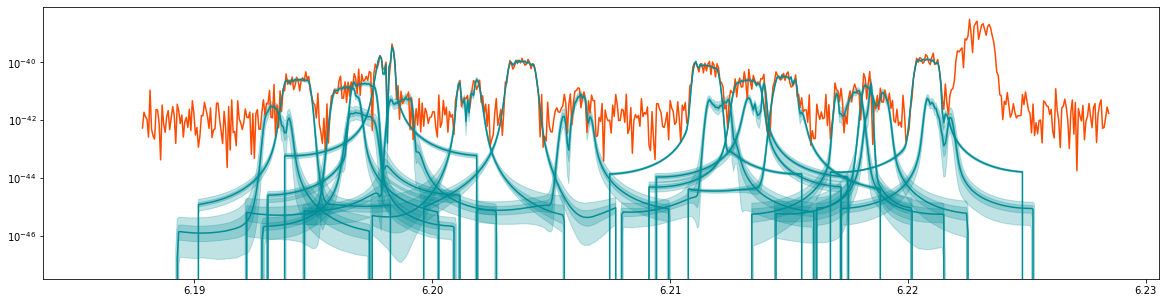

In [49]:
fig,ax=plt.subplots(figsize=figsize)

f = np.loadtxt(data,usecols=(0))
A = np.loadtxt(data,usecols=(1))
E = np.loadtxt(data,usecols=(2))
ax.semilogy(f*1000,A,color=orange)

for file in rec_files:
    f = np.loadtxt(file,usecols=(0))
    A50 = np.loadtxt(file,usecols=(1))
    A25 = np.loadtxt(file,usecols=(2))
    A75 = np.loadtxt(file,usecols=(3))
    A05 = np.loadtxt(file,usecols=(4))
    A95 = np.loadtxt(file,usecols=(5))
    ax.fill_between(f*1000,A05,A95,alpha=0.25,color=aqua)
    ax.fill_between(f*1000,A25,A75,alpha=0.25,color=aqua)
    ax.semilogy(f*1000,A50,color=aqua)

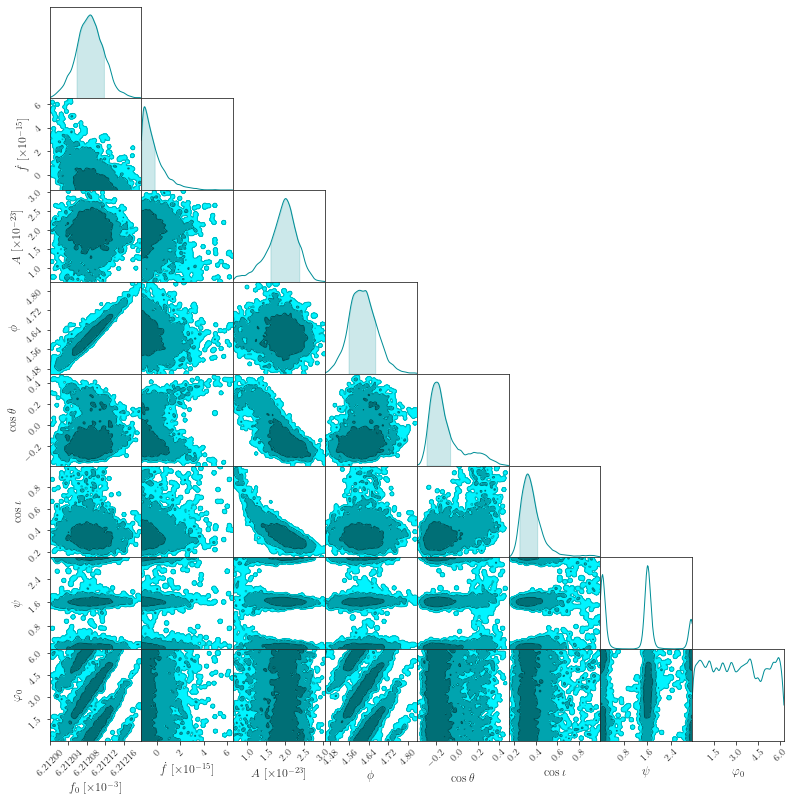

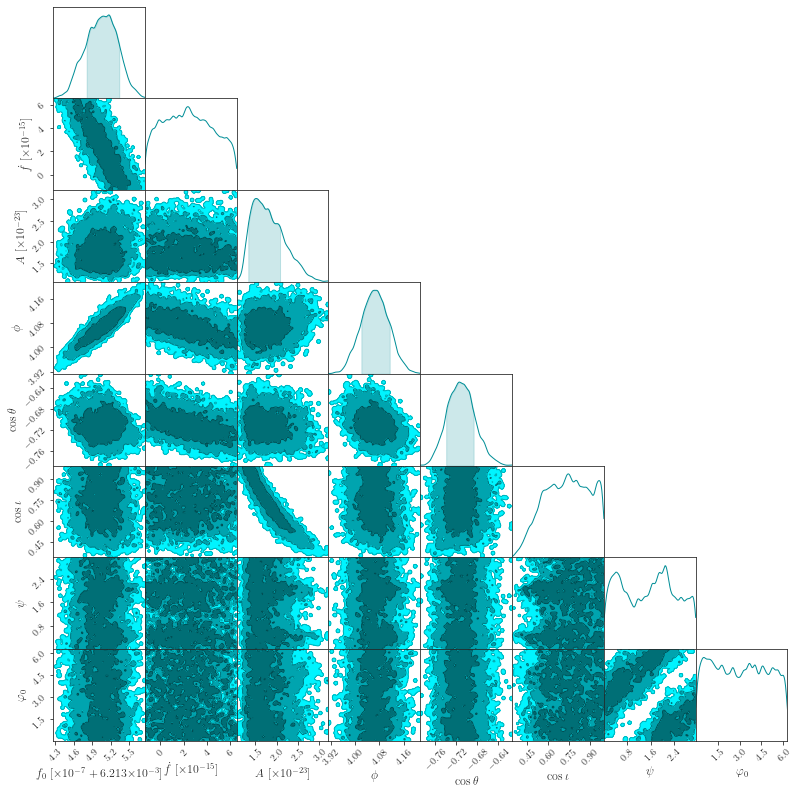

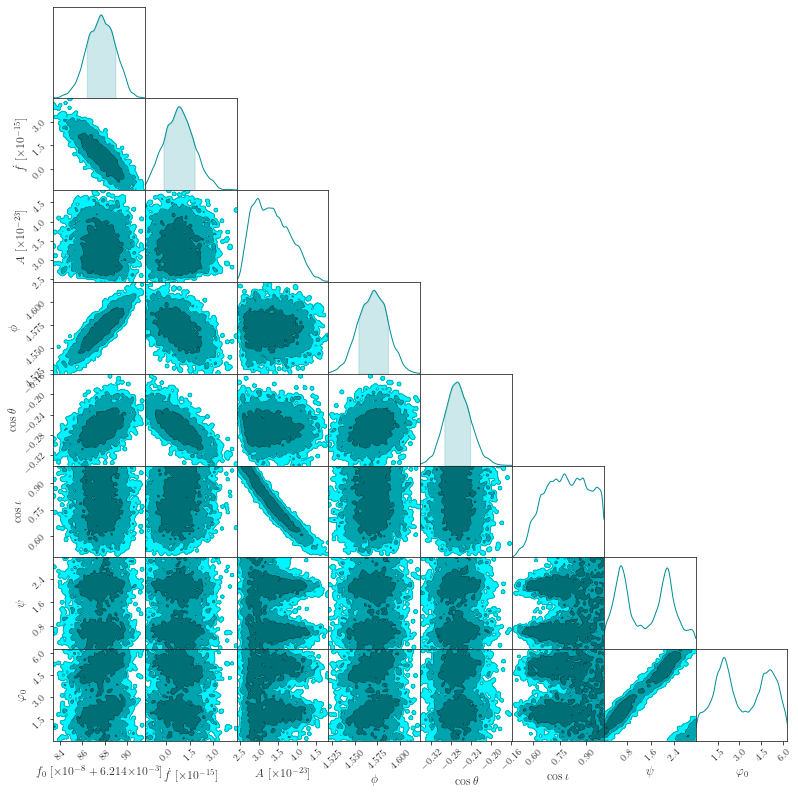

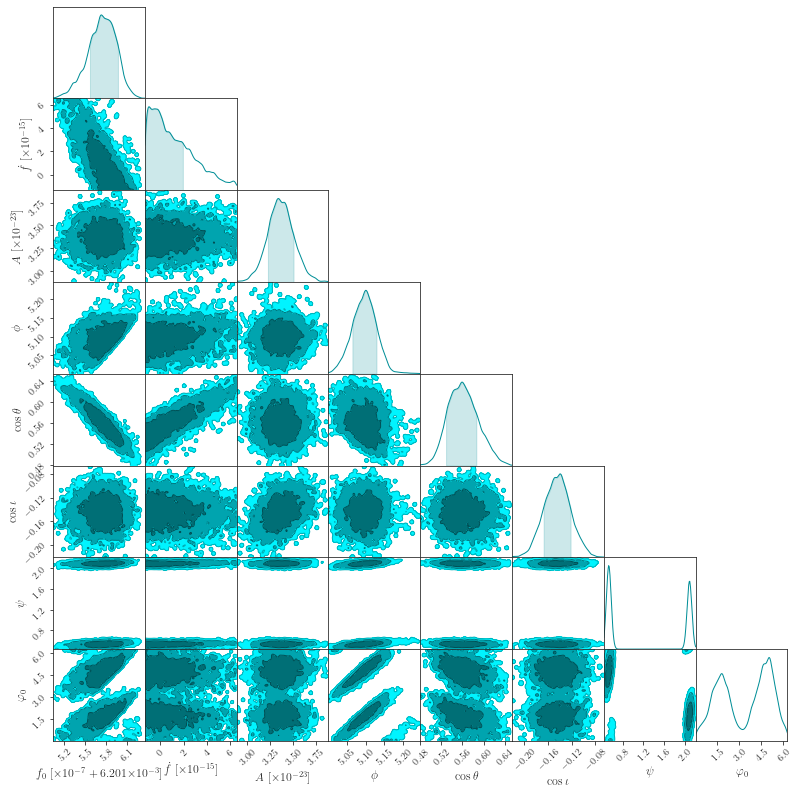

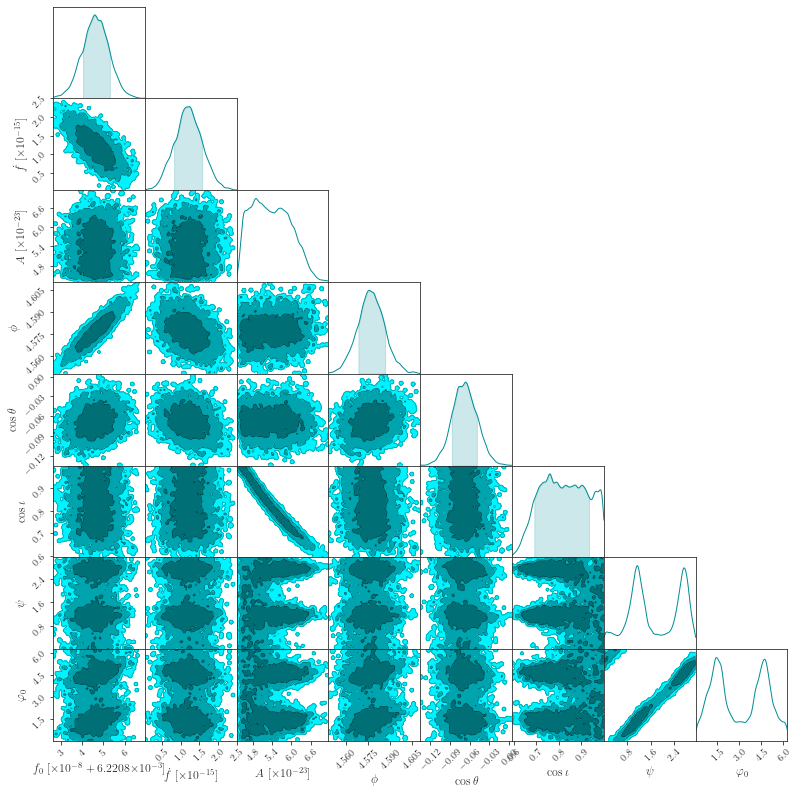

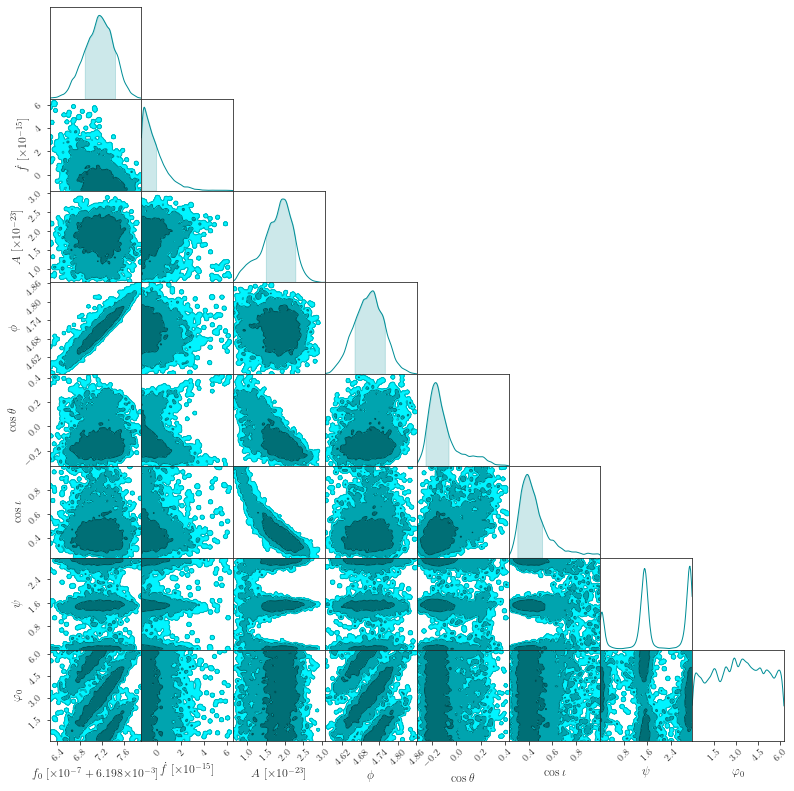

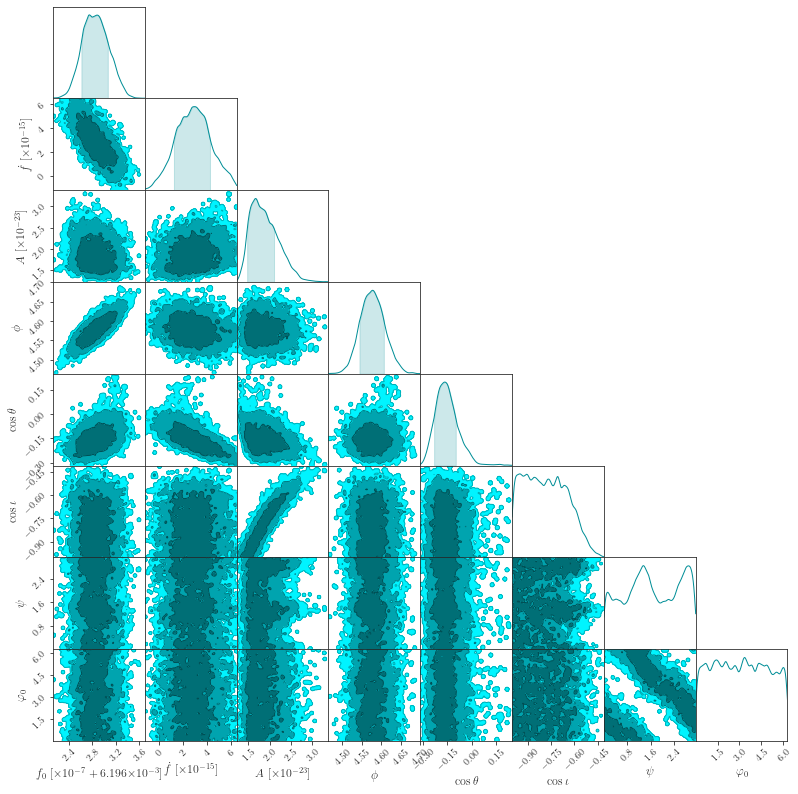

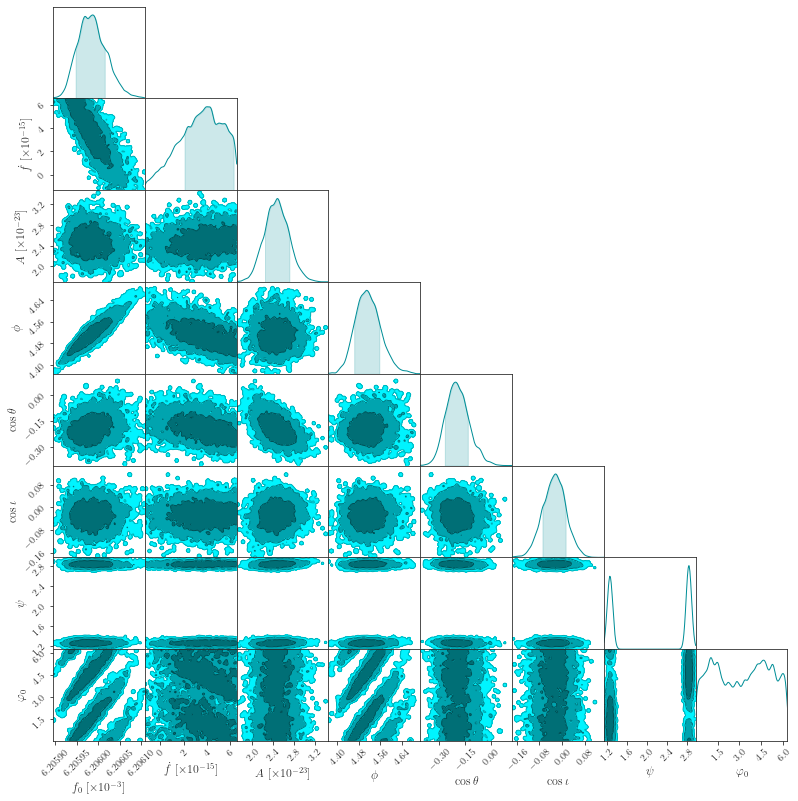

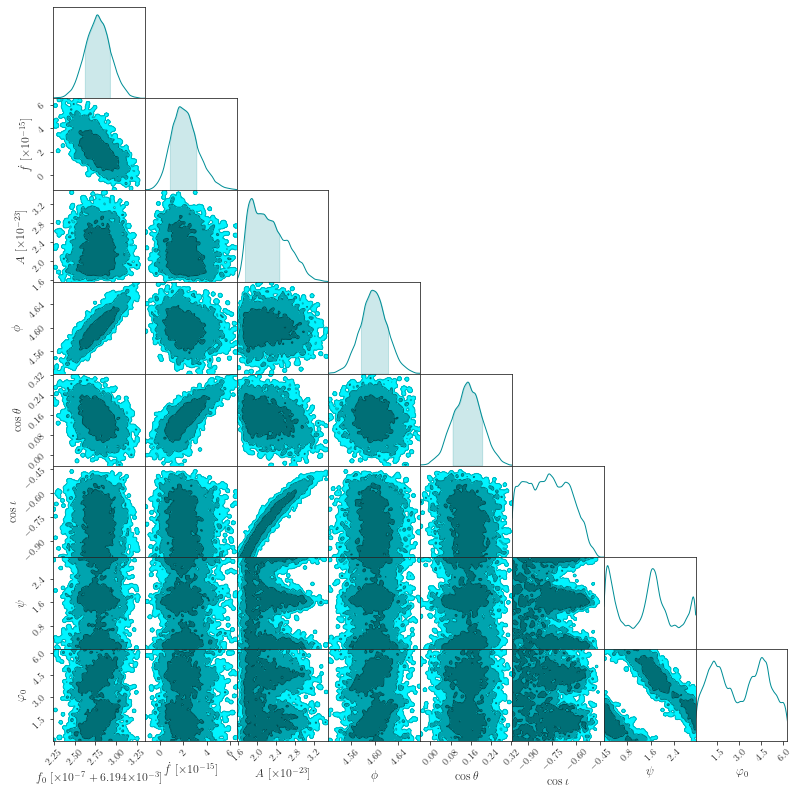

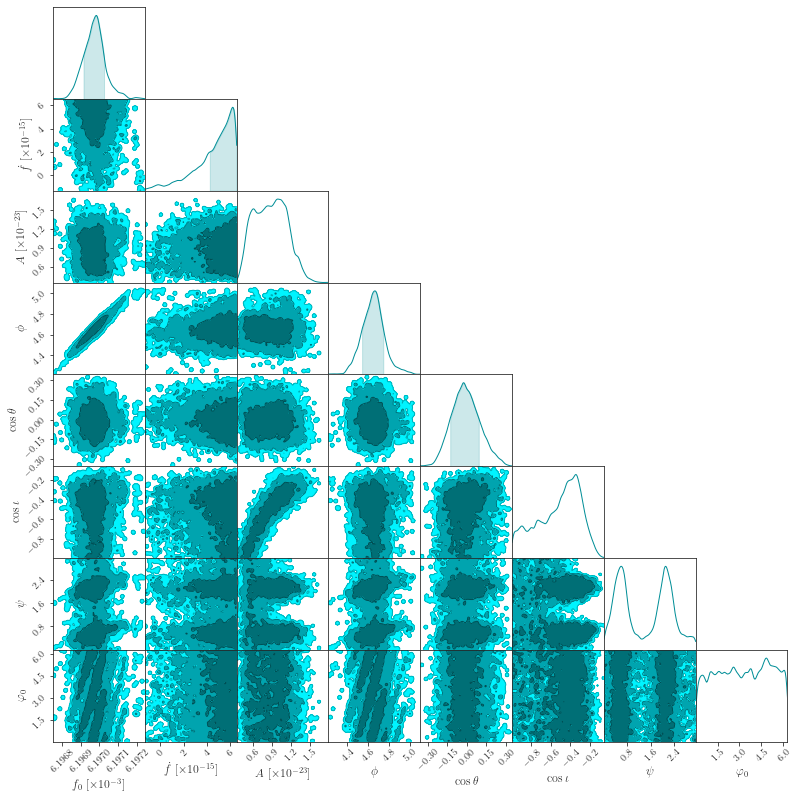

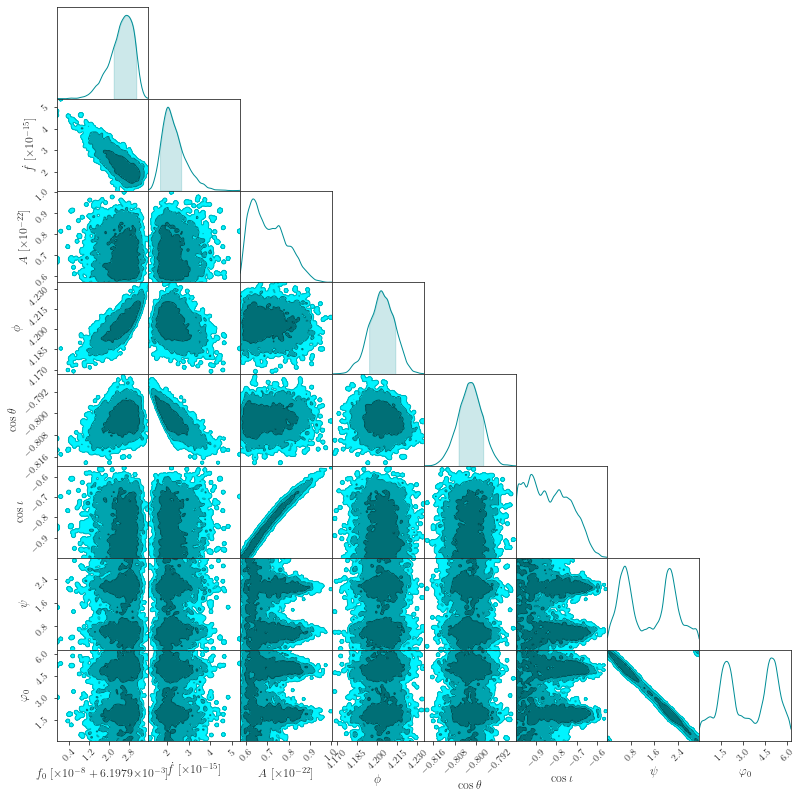

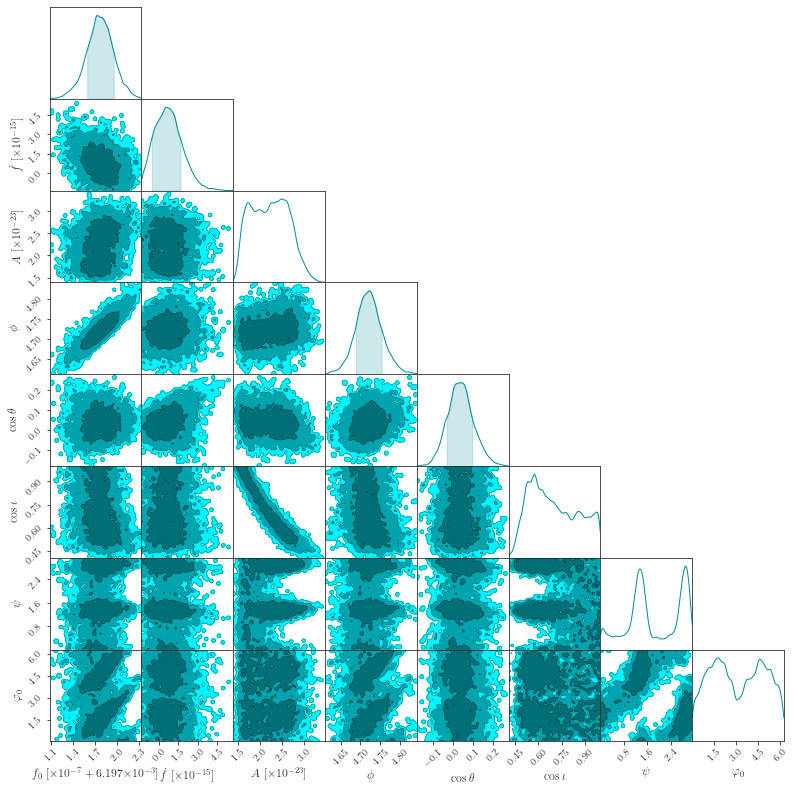

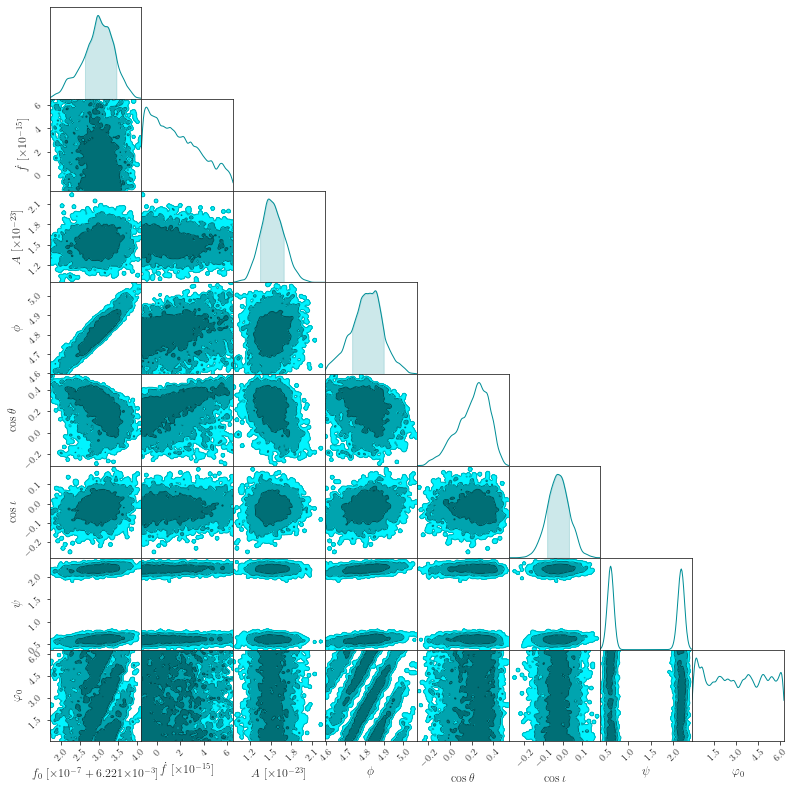

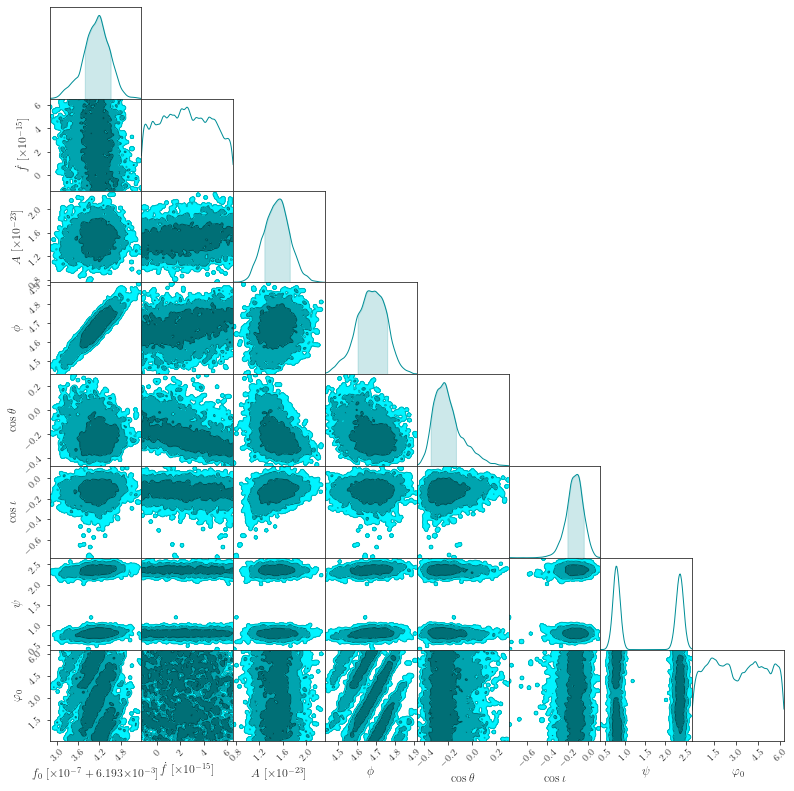

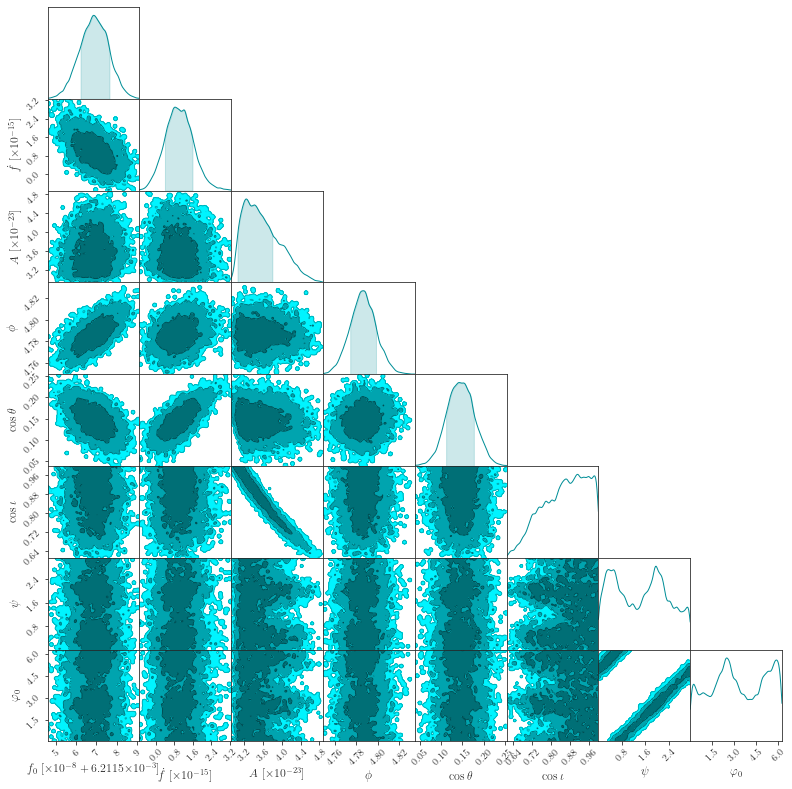

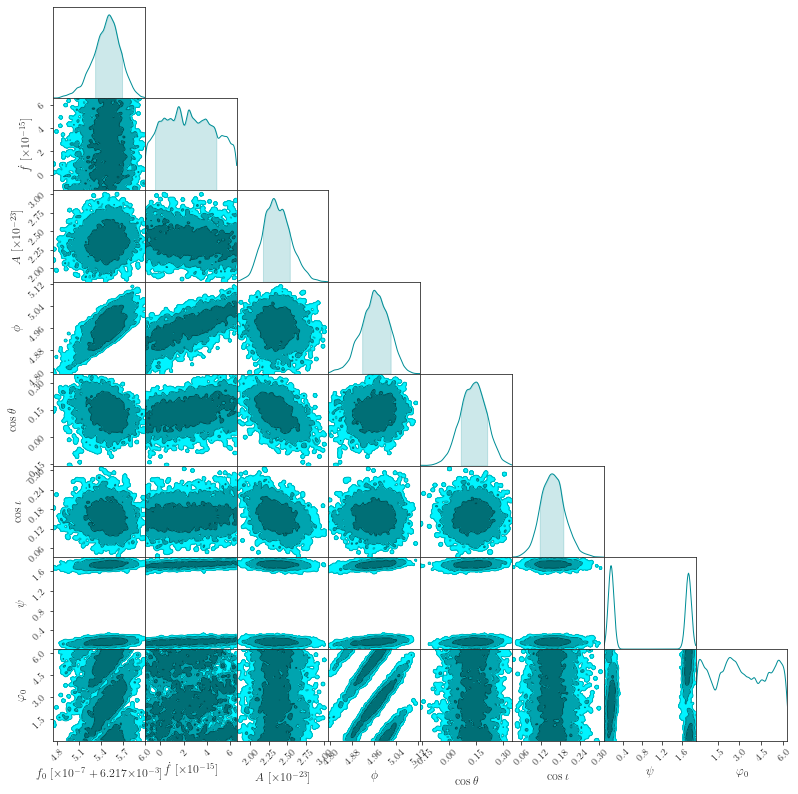

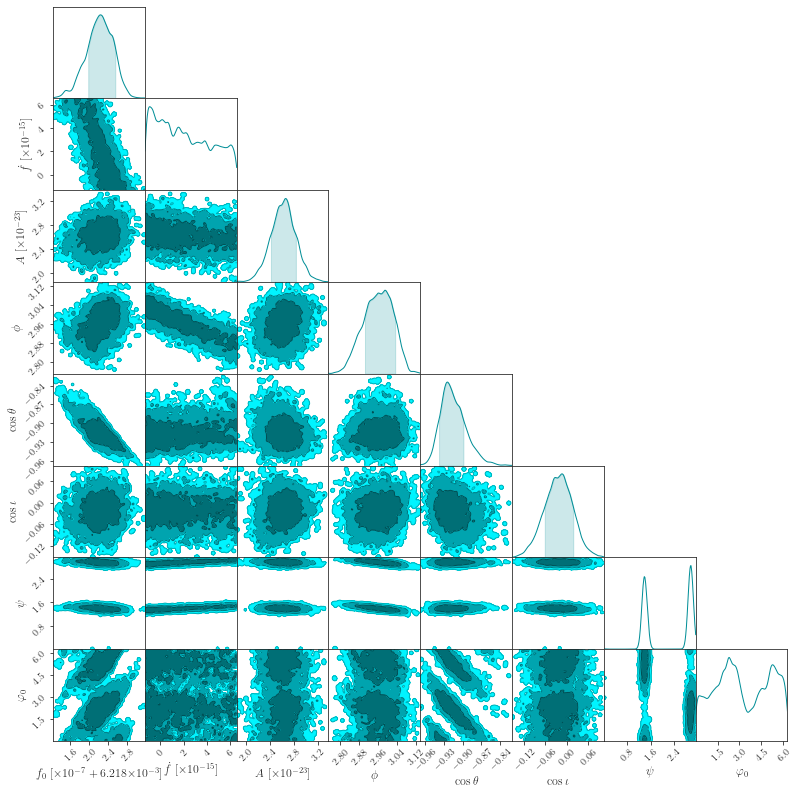

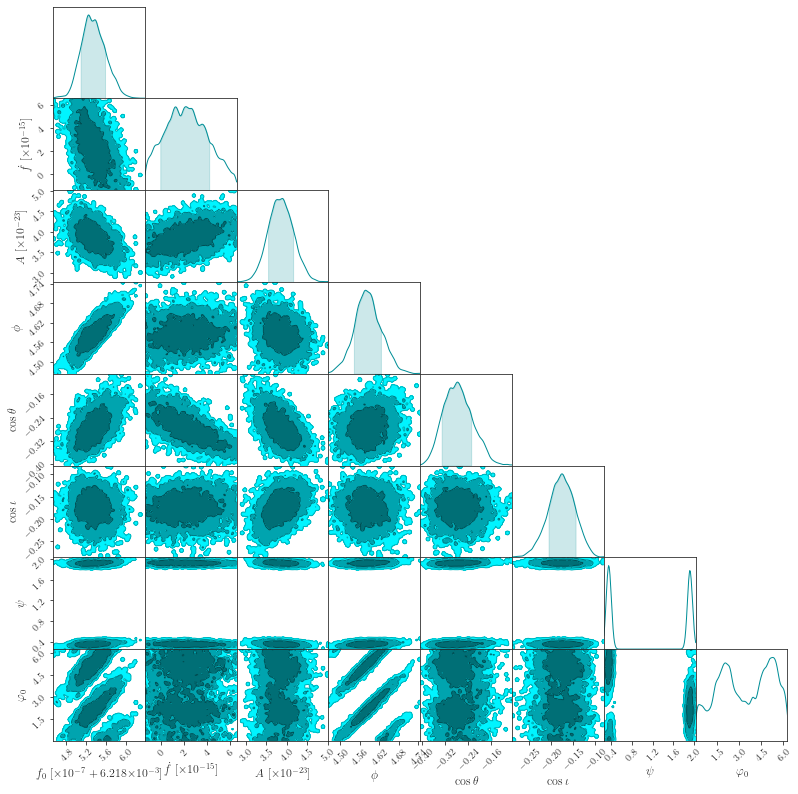

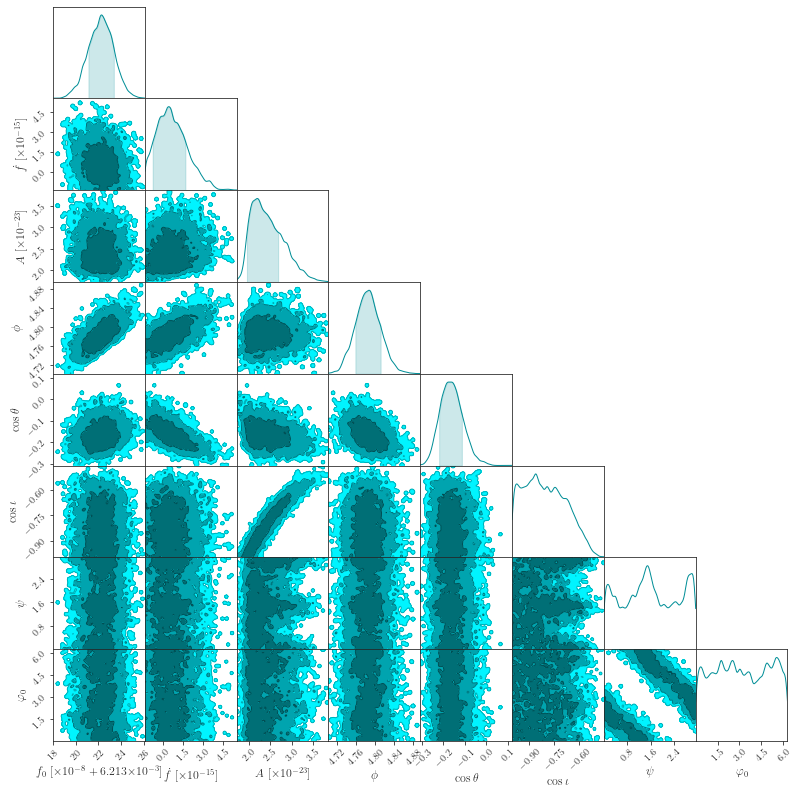

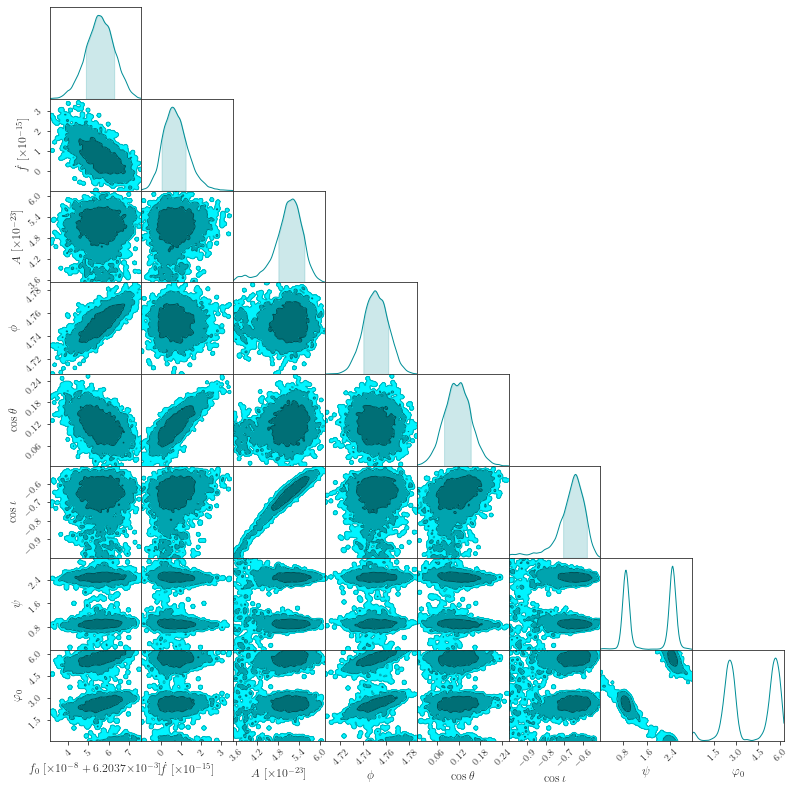

In [104]:
parameters=[r'$f_0$',r'$\dot f$',r'$A$',r'$\phi$',r'$\cos\theta$',r'$\cos\iota$',r'$\psi$',r'$\varphi_0$']
for file in chain_files:
    
    c=ChainConsumer()
    chain=np.loadtxt(file,usecols=(0,1,2,3,4,5,6,7))    
    name = file.replace('/','_').split('_')[2]
    
    c.add_chain(chain,parameters=parameters,color=aqua,name=name)
    c.configure(sigmas=[0,1,2,3])
    c.plotter.plot()

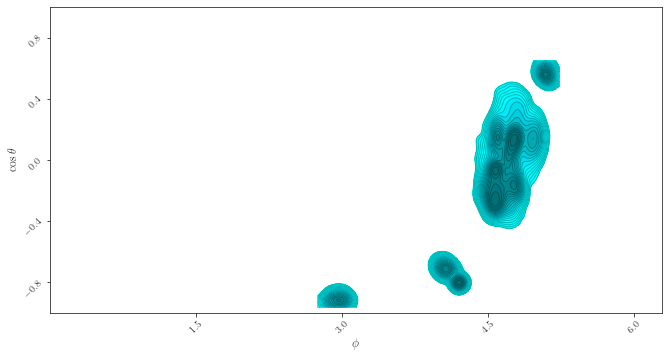

In [144]:
parameters=[r'$\phi$',r'$\cos\theta$']

c=ChainConsumer()
arrays = [np.loadtxt(f, usecols=(3,4)) for f in chain_files]
chain=np.concatenate(arrays)    
c.add_chain(chain,parameters=parameters,name=' ',plot_contour=True, color=aqua)
c.configure(plot_hists=False, sigmas=np.linspace(0,3,20))
plot=c.plotter.plot(figsize=(10,5),extents=[(0,2*np.pi),(-1,1)])

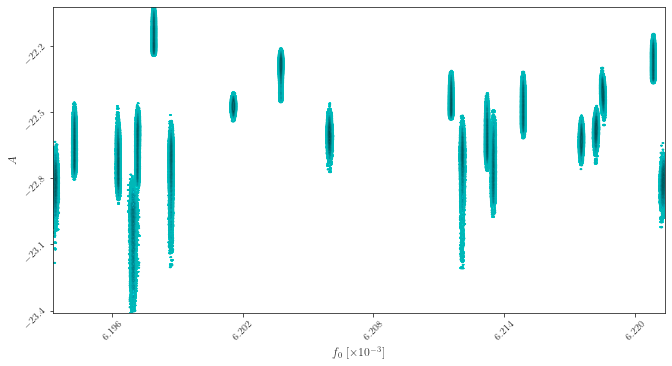

In [141]:
parameters=[r'$f_0$',r'$A$']

c=ChainConsumer()
arrays = [np.loadtxt(f, usecols=(0,2)) for f in chain_files]
chain=np.concatenate(arrays)  
chain[:,1]=np.log10(chain[:,1])
c.add_chain(chain,parameters=parameters,name=' ',plot_contour=True, color=aqua)
c.configure(plot_hists=False, sigmas=np.linspace(0,3,20),bins=10.0)
plot=c.plotter.plot(figsize=(10,5))

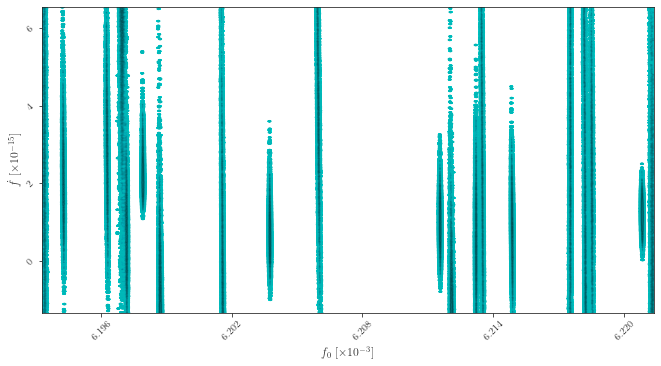

In [145]:
parameters=[r'$f_0$',r'$\dot f$']

c=ChainConsumer()
arrays = [np.loadtxt(f, usecols=(0,1)) for f in chain_files]
chain=np.concatenate(arrays)  
c.add_chain(chain,parameters=parameters,name=' ',plot_contour=True, color=aqua)
c.configure(plot_hists=False, sigmas=np.linspace(0,3,20),bins=10.0)
plot=c.plotter.plot(figsize=(10,5))

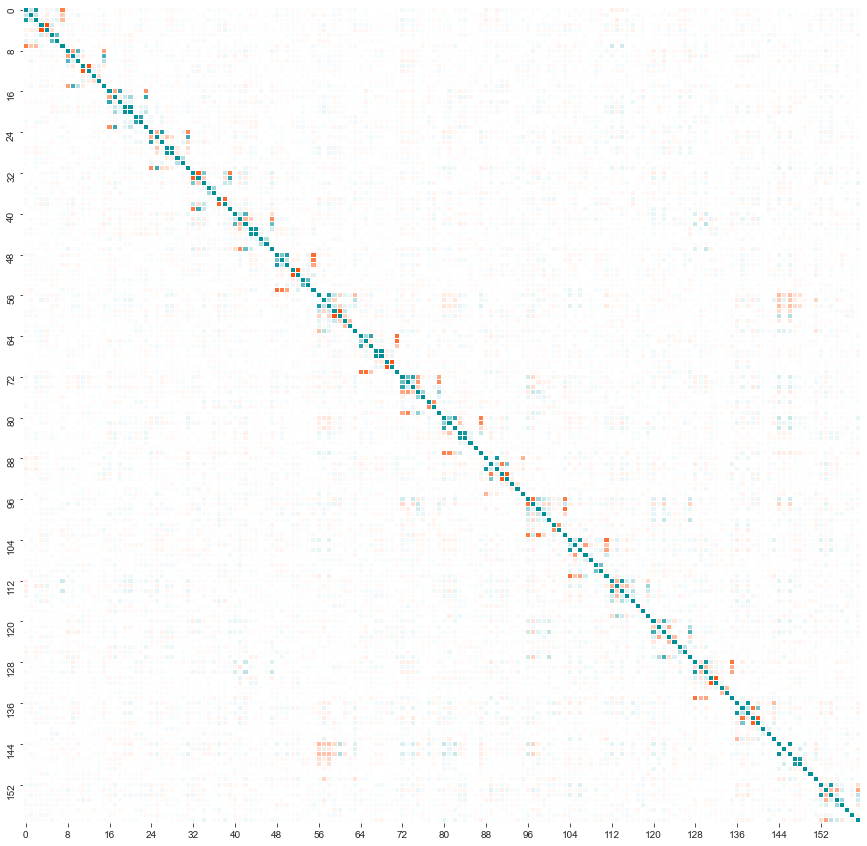

In [79]:
corr_files = glob.glob('catalog*/correlation_matrix.dat')
norm = matplotlib.colors.Normalize(-1,1)
colors = [[norm(-1.0), orange],
          [norm(0), "white"],
          [norm( 1.0), aqua]]
cmap = matplotlib.colors.LinearSegmentedColormap.from_list("", colors)

file = np.loadtxt(corr_files[0])
fig,ax=plt.subplots(figsize=(15,15))
ax = sns.heatmap(file,cmap=cmap, vmin=-1, vmax=1,xticklabels = 8, yticklabels = 8, linewidths=.1, cbar=False)

